In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt

import data
from models import random_forest_pcc
from modules.experiments import ActiveLearningExperiment
from plotting import plot_active_learning_phase_diagrams

x = data.x
y = data.y.filter(['sphere', 'worm', 'vesicle', 'other'], axis=1).replace(-1, 0)

## HPMA / CysMA

In [7]:
query1 = (data.x['core_HPMA'] == 1) & (data.x['corona_CysMA'] == 1)
x[query1][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
199,50,10.0,31,0.0,7.0,1,70
200,100,10.0,31,0.0,7.0,1,70
201,150,10.0,31,0.0,7.0,1,70
202,200,10.0,31,0.0,7.0,1,70
203,250,10.0,31,0.0,7.0,1,70
204,300,10.0,31,0.0,7.0,1,70
205,100,15.0,31,0.0,7.0,1,70
206,125,15.0,31,0.0,7.0,1,70
207,150,15.0,31,0.0,7.0,1,70
208,175,15.0,31,0.0,7.0,1,70


In [8]:
exp1 = ActiveLearningExperiment(random_forest_pcc, x[~query1], x[query1], y[~query1], y[query1], 12)
exp1.run()

............


/Users/mbol0005/Repositories/PISA_ML/data.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


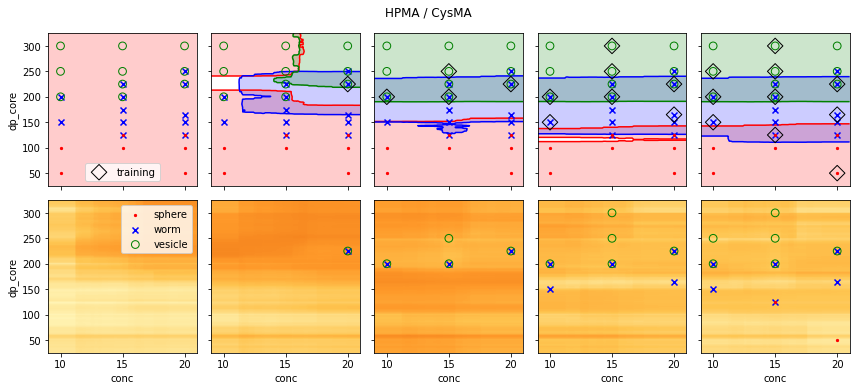

In [10]:
plot_active_learning_phase_diagrams(exp1)
plt.suptitle('HPMA / CysMA')
plt.show()

## MEMA / GMA

In [11]:
query2 = (data.x.core_MEMA == 1) & (data.x.corona_GMA == 1)
x[query2][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
424,30,10.0,29,0.0,3.5,0,70
425,35,10.0,29,0.0,3.5,0,70
426,38,10.0,29,0.0,3.5,0,70
427,43,10.0,29,0.0,3.5,0,70
428,58,10.0,29,0.0,3.5,0,70
429,70,10.0,29,0.0,3.5,0,70
430,74,10.0,29,0.0,3.5,0,70
431,78,10.0,29,0.0,3.5,0,70
432,84,10.0,29,0.0,3.5,0,70
433,89,10.0,29,0.0,3.5,0,70


In [12]:
exp2 = ActiveLearningExperiment(random_forest_pcc, x[~query2], x[query2], y[~query2], y[query2], 16)
exp2.run()

................


/Users/mbol0005/Repositories/PISA_ML/data.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


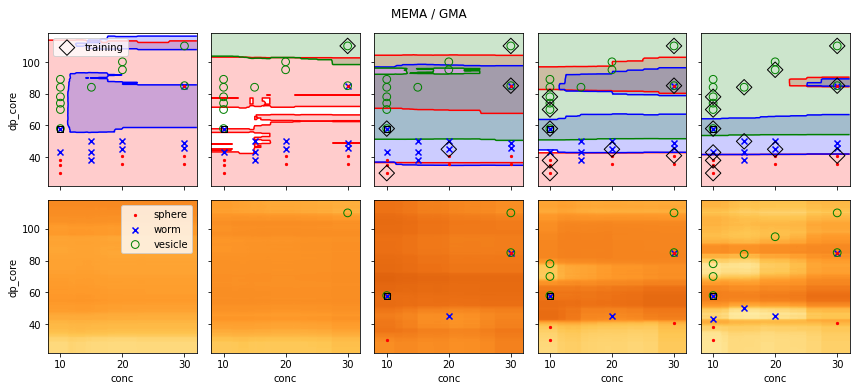

In [13]:
plot_active_learning_phase_diagrams(exp2, [0, 1, 5, 9, 13])
plt.suptitle('MEMA / GMA')
plt.show()

## HPMA / GMA

In [14]:
query3 = (data.x.core_HPMA == 1) & (data.x.corona_GMA == 1) & (data.x.dp_corona==78) & (data.x.salt==0) & (data.x.ph==7) & (data.x.charged==0) & (data.x.temp==70)
sum(query3), sum(~query3)

(44, 548)

In [15]:
exp3 = ActiveLearningExperiment(random_forest_pcc, x[~query3], x[query3], y[~query3], y[query3], 22)
exp3.run()

......................


/Users/mbol0005/Repositories/PISA_ML/data.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


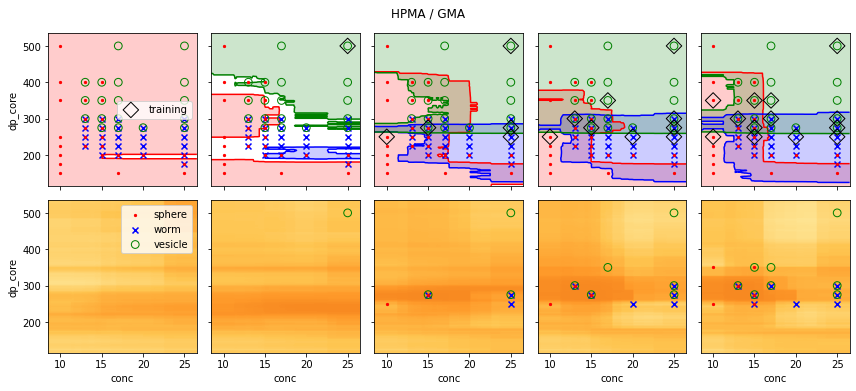

In [16]:
plot_active_learning_phase_diagrams(exp3, [0, 1, 5, 9, 13])
plt.suptitle('HPMA / GMA')
plt.show()

## GlyMA / GMA

In [17]:
query4 = (data.x.core_GlyMA == 1) & (data.x.corona_GMA == 1)
x[query4][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
311,100,10.0,45,0.0,5.20,0,70
312,100,10.0,45,0.0,7.10,0,70
313,100,10.0,45,0.0,4.50,0,40
314,100,10.0,45,0.0,7.20,0,40
315,100,10.0,45,0.0,4.20,0,50
316,100,10.0,45,0.0,7.10,0,50
317,300,10.0,45,0.0,7.00,0,50
318,400,10.0,45,0.0,7.00,0,50
319,100,10.0,45,0.0,3.00,0,30
327,25,15.0,25,0.0,2.75,0,50


In [18]:
exp4 = ActiveLearningExperiment(random_forest_pcc, x[~query4], x[query4], y[~query4], y[query4], 12)
exp4.run()

............


/Users/mbol0005/Repositories/PISA_ML/data.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


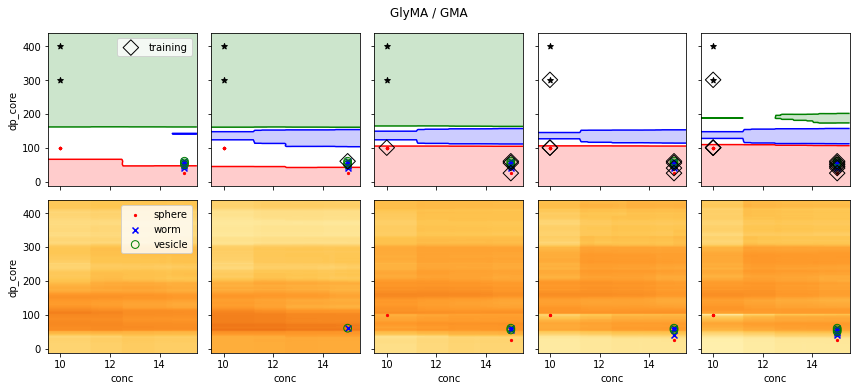

In [19]:
plot_active_learning_phase_diagrams(exp4)
plt.suptitle('GlyMA / GMA')
plt.show()

## BzMA / GMA

In [20]:
query5 = (data.x.core_BzMA == 1) & (data.x.corona_GMA == 1)
x[query5][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
555,50,10.0,51,0.0,7.0,0,70
556,75,10.0,51,0.0,7.0,0,70
557,100,10.0,51,0.0,7.0,0,70
558,125,10.0,51,0.0,7.0,0,70
559,150,10.0,51,0.0,7.0,0,70
560,175,10.0,51,0.0,7.0,0,70
561,200,10.0,51,0.0,7.0,0,70
562,250,10.0,51,0.0,7.0,0,70
563,300,10.0,51,0.0,7.0,0,70
564,400,10.0,51,0.0,7.0,0,70


In [21]:
exp5 = ActiveLearningExperiment(random_forest_pcc, x[~query5], x[query5], y[~query5], y[query5], 12)
exp5.run()


............


/Users/mbol0005/Repositories/PISA_ML/data.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


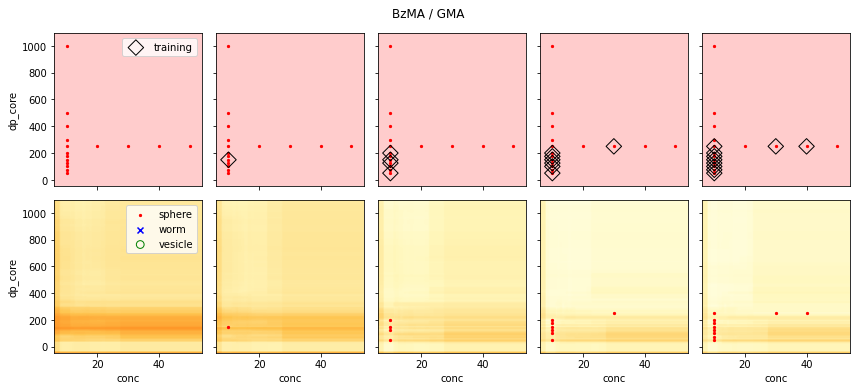

In [22]:
plot_active_learning_phase_diagrams(exp5)
plt.suptitle('BzMA / GMA')
plt.show()